# Lessons-Table Relations and Normalization
(Lesson text in accompanying markdown files; shell commands in shell script files)

### 1. Creating Tables

In [1]:
%%capture
%reload_ext sql
%sql sqlite:///new_database.db    

In [2]:
%%sql
CREATE TABLE user
     (user_id INTEGER,
      first_name TEXT,
      last_name TEXT
     );

 * sqlite:///new_database.db
(sqlite3.OperationalError) table user already exists
[SQL: CREATE TABLE user (user_id INTEGER,
      first_name TEXT,
      last_name TEXT
     );]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [3]:
%%sql
SELECT *
  FROM user;  

 * sqlite:///new_database.db
Done.


user_id,first_name,last_name


In [4]:
%%sql
DROP TABLE user

 * sqlite:///new_database.db
Done.


[]

In [5]:
%%sql
CREATE TABLE user
     (user_id INTEGER,
      first_name TEXT,
      last_name TEXT
     );

 * sqlite:///new_database.db
Done.


[]

In [6]:
%%sql
SELECT *
  FROM user;  

 * sqlite:///new_database.db
Done.


user_id,first_name,last_name


### 2. Primary and Foreing Keys

In [7]:
%%capture
%reload_ext sql
%sql sqlite:///chinook.db    

In [8]:
%%sql
CREATE TABLE wishlist
     (wishlist_id INTEGER PRIMARY KEY,
      customer_id INTEGER,
      name TEXT,
      FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
     );


 * sqlite:///chinook.db
   sqlite:///new_database.db
Done.


[]

In [10]:
%%sql
SELECT *
  FROM wishlist;

 * sqlite:///chinook.db
   sqlite:///new_database.db
Done.


wishlist_id,customer_id,name


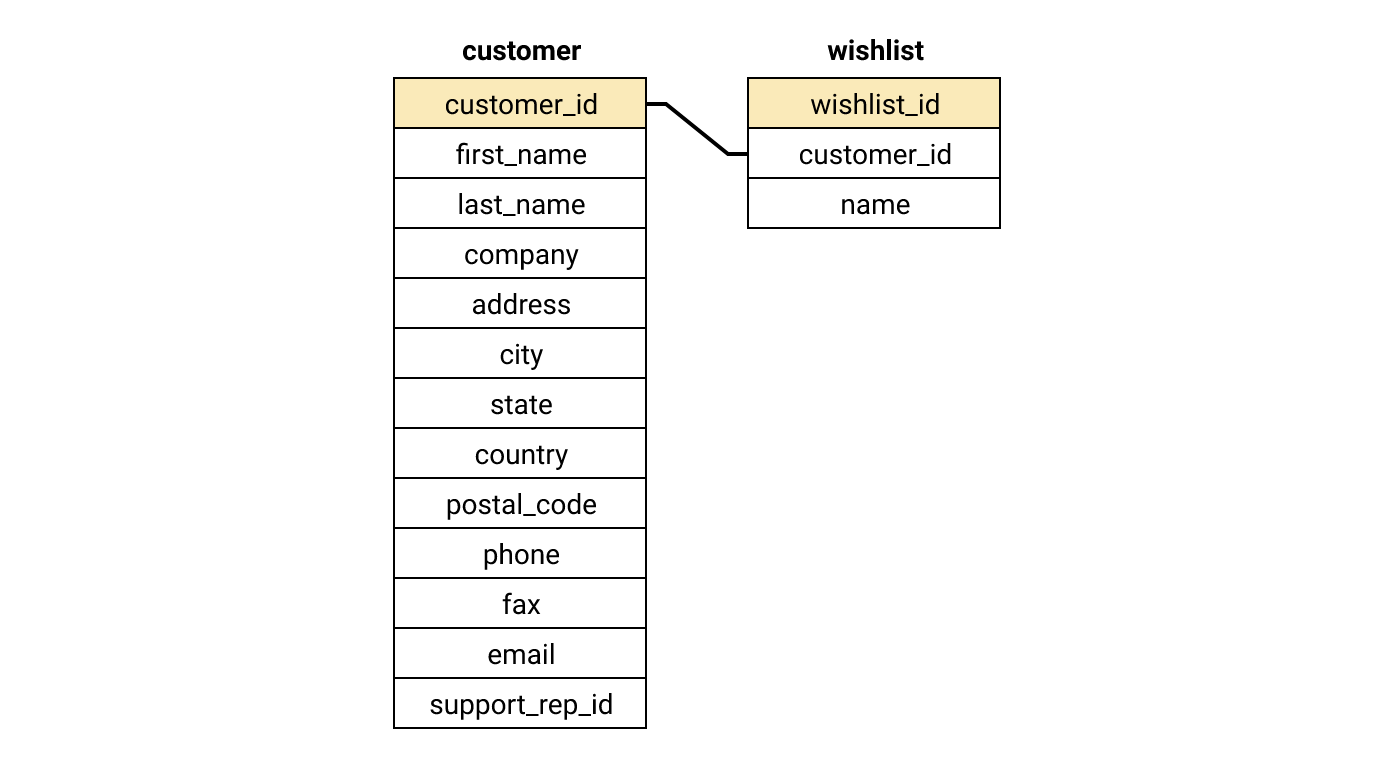

### 3. Database Normalization
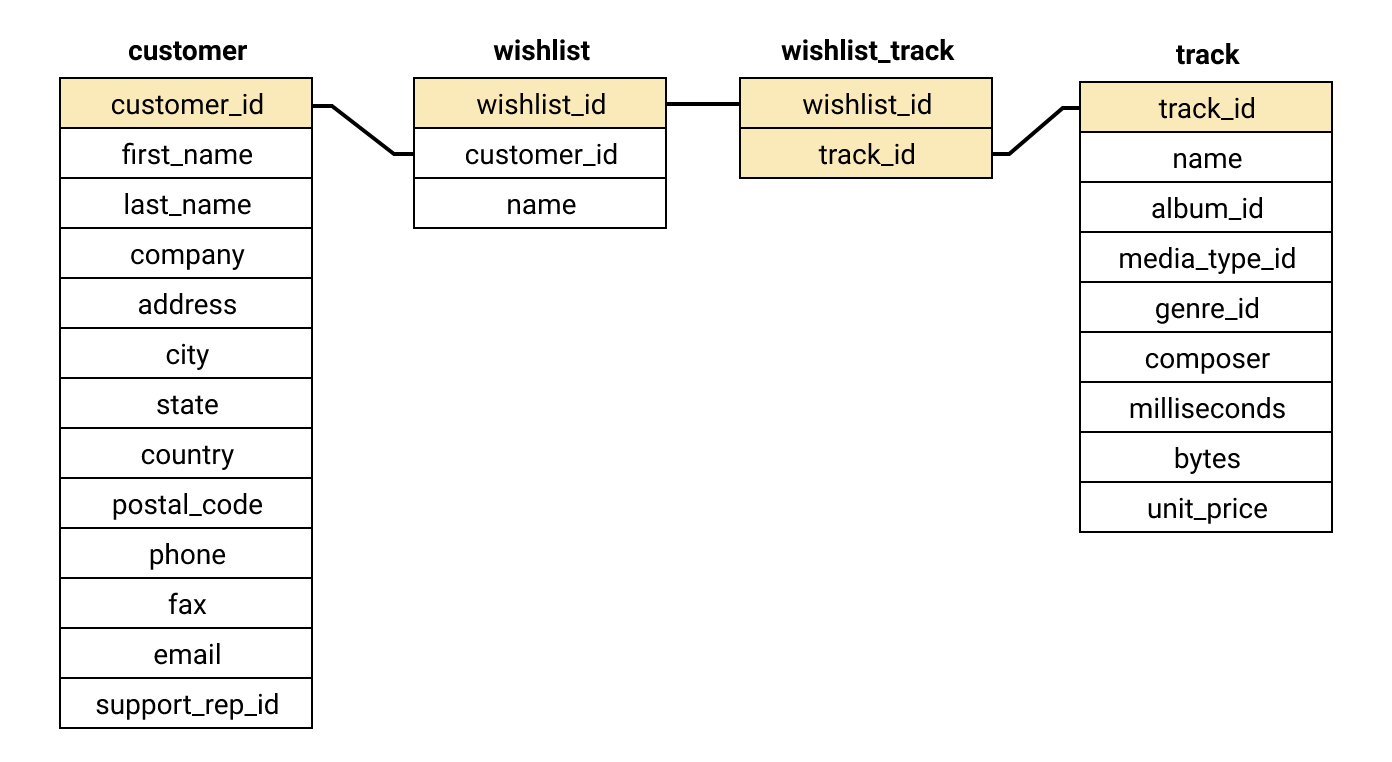

In [12]:
%%sql
CREATE TABLE wishlist_track (                              
     wishlist_id INTEGER,                                       
     track_id INTEGER,                                          
     PRIMARY KEY (wishlist_id, track_id),                       
     FOREIGN KEY (wishlist_id) REFERENCES wishlist(wishlist_id),
     FOREIGN KEY (track_id) REFERENCES track(track_id)                       
     );  

 * sqlite:///chinook.db
   sqlite:///new_database.db
Done.


[]

### 4. Inserting and Deleting Rows in Tables

In [14]:
%%sql
INSERT INTO wishlist                                                    
VALUES                                                                  
      (1,34,"Joao's awesome wishlist"), 
      (2,18,"Amy loves pop");


 * sqlite:///chinook.db
   sqlite:///new_database.db
2 rows affected.


[]

In [16]:
%%sql
INSERT INTO wishlist_track                                                    
VALUES                                                                  
      (1,1158), 
      (1,2646),
      (1,1990),
      (2,3272),
      (2,3470);

 * sqlite:///chinook.db
   sqlite:///new_database.db
5 rows affected.


[]

### 5. Adding Columns to a Table


In [17]:
%%sql
ALTER TABLE wishlist                                                    
    ADD COLUMN active NUMERIC;  

 * sqlite:///chinook.db
   sqlite:///new_database.db
Done.


[]

In [18]:
%%sql
ALTER TABLE wishlist_track                                                    
    ADD COLUMN active NUMERIC; 

 * sqlite:///chinook.db
   sqlite:///new_database.db
Done.


[]

### Adding Values to existing Rows

In [19]:
%%sql
UPDATE wishlist                                                         
    SET active=1;

 * sqlite:///chinook.db
   sqlite:///new_database.db
2 rows affected.


[]

In [20]:
%%sql
UPDATE wishlist_track                                                         
    SET active=1;

 * sqlite:///chinook.db
   sqlite:///new_database.db
5 rows affected.


[]

In [22]:
%%sql
ALTER TABLE invoice
  ADD COLUMN tax NUMERIC;
ALTER TABLE invoice
  ADD COLUMN subtotal NUMERIC;


 * sqlite:///chinook.db
   sqlite:///new_database.db
(sqlite3.OperationalError) duplicate column name: tax
[SQL: ALTER TABLE invoice ADD COLUMN tax NUMERIC;]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [24]:
%%sql
ALTER TABLE invoice
  ADD COLUMN subtotal NUMERIC;


 * sqlite:///chinook.db
   sqlite:///new_database.db
(sqlite3.OperationalError) duplicate column name: subtotal
[SQL: ALTER TABLE invoice ADD COLUMN subtotal NUMERIC;]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [25]:
%%sql
UPDATE invoice
   SET
     tax = 0,
     subtotal = total;

 * sqlite:///chinook.db
   sqlite:///new_database.db
614 rows affected.


[]